<a href="https://colab.research.google.com/github/StarHub190/chemfo/blob/main/Prediksi_Kelarutan_Senyawa_Kimia_(Regresi_Linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Latar Belakang

Dalam bidang farmasi atau lingkungan, kelarutan senyawa dalam air merupakan hal yang cukup penting. Hal ini dikarenakan kelarutan dapat mempengaruhi kinerja tubuh dalam menyerap obat serta bagaimana polutan menyebar di lingkungan. Mengukur kelarutan di Laboratorium bisa memakan waktu dan biaya.

Tujuan dari riset ini adalah untuk membuat model machine learning yang dapat memprediksi nilai kelarutan ($logS$) suatu senyawa berdasarkan fitur-fitur molekulernya yang mudah dihitung.

Dataset yang digunakan pada penelitian ini berasal dari John S. Delaney, yang berisi sekitar 1144 senyawa dengan nilai kelarutan ($logS$) yang sudah diukur dengan 4 fitur molekuler dasar (*molecular descriptors*)

- `logS`: Target kita. Logaritma dari kelarutan molar (mol/L)
- `MolLogP`: Ukuran hidrofobisitas molekul
- `MolWt`: Berat molekul (g/mol)
- `NumRotatableBonds`: Jumlah ikatan yang bisa berotasi
- `AromaticProportion`: Proporsi atom yang berada dalam cincin aromatik



**Setup Library**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Loading Dataset

In [9]:
url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
data = pd.read_csv(url)

print(data.head())

print('\nInformasi Dataset', data.info())

   MolLogP    MolWt  NumRotatableBonds  AromaticProportion  logS
0   2.5954  167.850                0.0                 0.0 -2.18
1   2.3765  133.405                0.0                 0.0 -2.00
2   2.5938  167.850                1.0                 0.0 -1.74
3   2.0289  133.405                1.0                 0.0 -1.48
4   2.9189  187.375                1.0                 0.0 -3.04
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB

Informasi Dataset None


### Visualisasi Distribusi logS

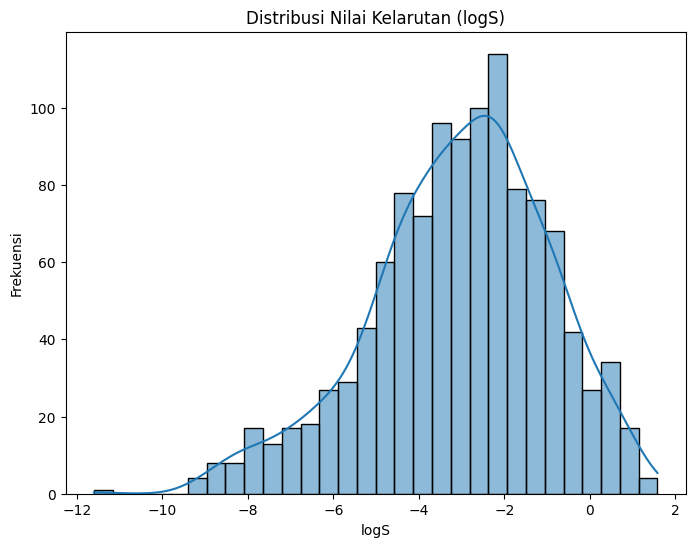

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data['logS'], kde=True, bins=30)
plt.title('Distribusi Nilai Kelarutan (logS)')
plt.xlabel('logS')
plt.ylabel('Frekuensi')
plt.show()

Distribusi logS terlihat mendekati normal, dimana bentuk kurvanya menyerupai bentuk lonceng. Sehingga, kondisi ini ideal untuk memulai banyak model regresi

### Memisahkan fitur (X) dan target (y)

In [19]:
X = data.drop(['logS'], axis=1) # axis=1 berarti membuang kolom
y= data['logS']

print('\nFitur')
print(X.head())
print('\nTarget')
print(y.head())


Fitur
   MolLogP    MolWt  NumRotatableBonds  AromaticProportion
0   2.5954  167.850                0.0                 0.0
1   2.3765  133.405                0.0                 0.0
2   2.5938  167.850                1.0                 0.0
3   2.0289  133.405                1.0                 0.0
4   2.9189  187.375                1.0                 0.0

Target
0   -2.18
1   -2.00
2   -1.74
3   -1.48
4   -3.04
Name: logS, dtype: float64


### Splitting dataset (80% train, 20% testing)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

print(f'Ukuran data training: {X_train.shape}')
print(f'Ukuran data testing: {X_test.shape}')


Ukuran data training: (915, 4)
Ukuran data testing: (229, 4)


### Model training

In [21]:
model = LinearRegression()
# training model
model.fit(X_train, y_train)

print('\nModel Training Selesai')


Model Training Selesai


### Evaluasi Model

In [22]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Square Error: {rmse:.2f}')
print(f'R-Squared: {r2:.2f}')

Root Mean Square Error: 1.04
R-Squared: 0.79


**Penjelasan Metrik**

- **Root Mean Squared Error**: Rata-rata seberapa jauh prediksi kita dari nilai sebenarnya, dalam satuan yang sama dengan target (`logS`). **Semakin kecil nilainya semakin bagus**

- **R-squared**: Seberapa besar proporsi variasi dari target (`logS`) yang dapat dijelaskan oleh model kita.

Dari hasil diatas, menunjukkan bahwa rata-rata prediksi kita berdasarkan data asli meleset di sekitar 1.01 `logS`.

Selain itu, model kita dapat menjelaskan 77% variasi data kelarutan, hal ini menunjukkan prediksi model sudah terbilang baik

### Visualisasi nilai logS sebenernya VS prediksi

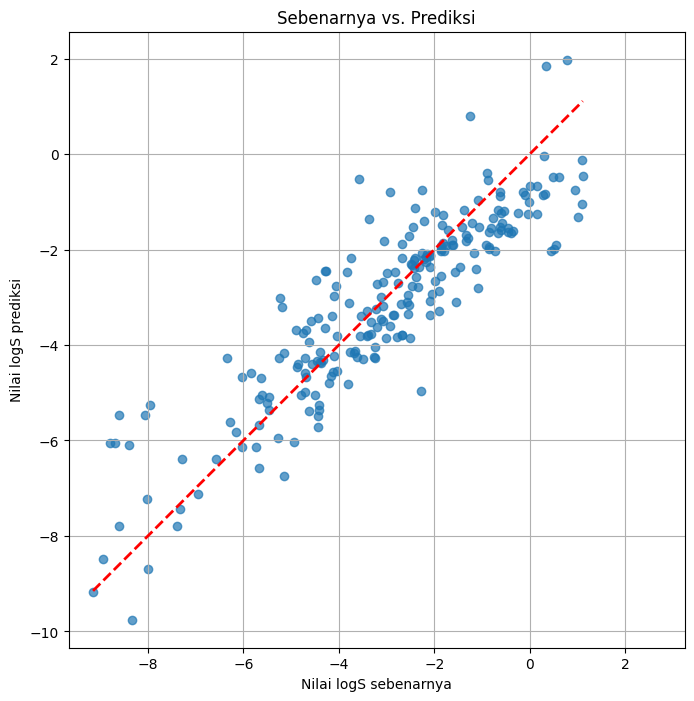

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', lw=2) #lw(linewidth), pake minmax buat gambar plotnya
plt.xlabel('Nilai logS sebenarnya')
plt.ylabel('Nilai logS prediksi')
plt.title('Sebenarnya vs. Prediksi')
plt.axis('equal')
plt.axis('square')
plt.grid(True)
plt.show()

1. Interpretasi:  Iya model sederhana ini cukup berguna untuk memberikan estimasi awalan kelarutan di laboratorium. Hal ini dikarenakan 0.77 ini menunjukkan adanya hubungan antara faktor kelarutan dengan target kelarutan itu sendiri. Yang mana 0.77 ini memberikan kejelasan bahwa 77% dari keempat fitur ini dapat menjelaskan kelarutan senyawa.

2. Prediksi kelarutan senyawa
- `MolLogP = 2.5`
- `MolWt = 150.0`
- `NumRotatableBonds = 3`
- `AromaticProportion = 0.5`

Dari keempat fitur tersebut, didapatkan kelarutan senyawa diatas adalah **-2.80 logS**

In [39]:
new_data = pd.DataFrame({
    'MolLogP': [2.5],
    'MolWt': [150.0],
    'NumRotatableBonds': [3],
    'AromaticProportion': [0.5]
})

predict = model.predict(new_data)
print(f'kelarutan senyawa baru: {predict[0]:.2f} logS')

kelarutan senyawa baru: -2.80 logS
